In [22]:
import numpy as np
import matplotlib.pyplot as plt
d     = np.array([[0, 0.001, 0.22, 1.72],
                [10, 9.7, 0.54, 11.1],
                [20, 19.2, 0.88, 21.1],
                [30, 28.4, 1.23, 31.3],
                [40, 36.9, 1.58, 41.8],
                [50, 44.9, 1.96, 52.9],
                [100, 120, 4.32, 120]])

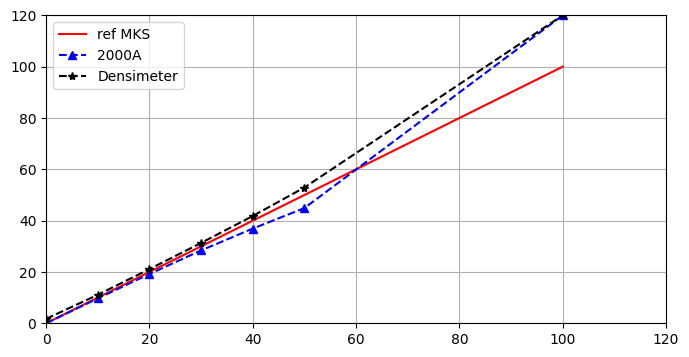

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(d[:,0], d[:,0], 'r-', label='ref MKS')
plt.plot(d[:,0], d[:,1], 'b--^', label='2000A')
plt.plot(d[:,0], d[:,3], 'k--*', label='Densimeter')
plt.legend()
plt.xlim(0,120)
plt.ylim(0,120)
plt.grid()
plt.show()

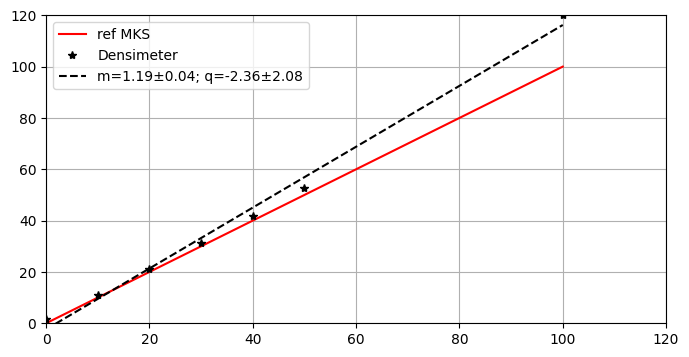

In [26]:
def func(x, m, q):
    return m*x + q
def func2(x, a, b, c):
    return a*x**2 + b*x + c
from scipy.optimize import curve_fit
plt.figure(figsize=(8, 4))
plt.plot(d[:,0], d[:,0], 'r-', label='ref MKS')
plt.plot(d[:,0], d[:,3], 'k*', label='Densimeter')
popt, pcov = curve_fit(func, d[:,0], d[:,3])
err = np.sqrt(np.diag(pcov))
plt.plot(d[:,0], func(d[:,0], *popt), 'k--', label='m={:.2f}±{:.2f}; q={:.2f}±{:.2f}'.format(popt[0], err[0], popt[1], err[1]))
plt.legend()
plt.xlim(0,120)
plt.ylim(0,120)
plt.grid()
plt.show()

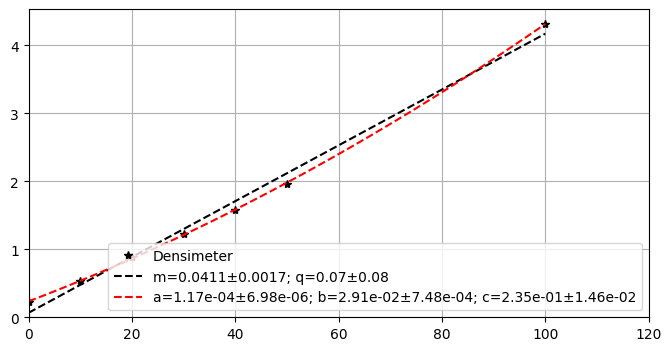

In [59]:
plt.figure(figsize=(8, 4))
plt.plot(d[:,0], d[:,2], 'k*', label='Densimeter')
popt, pcov = curve_fit(func, d[:,0], d[:,2])
popt2, pcov2 = curve_fit(func2, d[:,0], d[:,2])
err = np.sqrt(np.diag(pcov))
err2 = np.sqrt(np.diag(pcov2))
plt.plot(d[:,0], func(d[:,0], *popt), 'k--', label='m={:.4f}±{:.4f}; q={:.2f}±{:.2f}'\
         .format(popt[0], err[0], popt[1], err[1]))
x=np.linspace(0, 100, 100)
plt.plot(x, func2(x, *popt2), 'r--', label='a={:.2e}±{:.2e}; b={:.2e}±{:.2e}; c={:.2e}±{:.2e}'\
         .format(popt2[0], err2[0], popt2[1], err2[1], popt2[2], err2[2]))
plt.legend()
plt.xlim(0,120)
plt.ylim(0,)
plt.grid()
plt.show()

In [65]:
# coefficente di correzione 
dHe_offset = 0.251
dCF4_offset = 4.34
T = 23.0
P = 997
dHe = 4.003*P/(0.0821/0.000986923*(T+273.15)) # densita' solo He
dCF4 = 88.0043*P/(0.0821/0.000986923*(T+273.15)) # densita' solo CF4
dCF40 = 88.0043*P/(0.0821/0.000986923*(273.15))
dHe0 = 4.003*P/(0.0821/0.000986923*(273.15))
print(dHe, popt[1], dHe-popt[1])

0.16199780293272392 0.06608695087728267 0.09591085205544125


In [29]:
print("densita' a 0 gardi CF4: {:.3f} ,He: {:.3f}".format(dCF40, dHe0))
print("densita' calcolata a {:.1f} gardi CF4: {:.3f} He: {:.3f}".format(T, dCF4, dHe))
print("Densimetro a {} misrato CF4: {}, He: {}".format(T, dCF4_offset, dHe_offset))

densita' a 0 gardi CF4: 3.873 ,He: 0.176
densita' calcolata a 23.0 gardi CF4: 3.572 He: 0.162
Densimetro a 23.0 misrato CF4: 4.34, He: 0.22


In [32]:
# flow meter 20A6
F = np.array([[0 ,1.00,0.12],
              [4 ,1.93,0.12],
              [8 ,2.87,0.12],
              [12,3.70,0.12],
              [16,4.41,0.12],
              [20,5.00,0.12]])

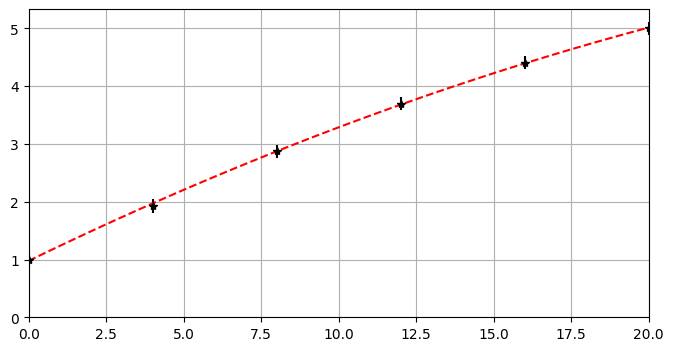

In [55]:
def funcl(x, a, b):
    import numpy as np
    return a*np.log2(x) + b
plt.figure(figsize=(8, 4))
plt.errorbar(F[:,0], F[:,1], yerr=F[:,2], fmt='k*', label='DF-20A6')
popt2, pcov2 = curve_fit(func2, F[:,0], F[:,1])
err = np.sqrt(np.diag(pcov))
x=np.linspace(0, 20, 100)
plt.plot(x, func2(x, *popt2), 'r--', label='a={:.2e}±{:.2e}; b={:.2e}±{:.2e}; c={:.2e}±{:.2e}'\
         .format(popt2[0], err2[0], popt2[1], err2[1], popt2[2], err2[2]))

plt.grid()
plt.ylim(0,)
plt.xlim(0,20)
plt.show()

In [50]:
func2(0.25, *popt2)

1.0413484933030563

In [ ]:
func2(0.25, *popt2)

In [145]:
d2     = np.array([[0, 0.03, 0.251, 0.174],
                   [100, 99.5, 4.36, 120],
                   [20, 19.0, 0.907 ,19.1],
                   [40, 36.8, 1.61, 40.2],
                   [50, 44.6, 1.98,51.2],
                   [30, 28.3, 1.25, 29.5],
                   [10, 9.77, 0.577, 9.49]])

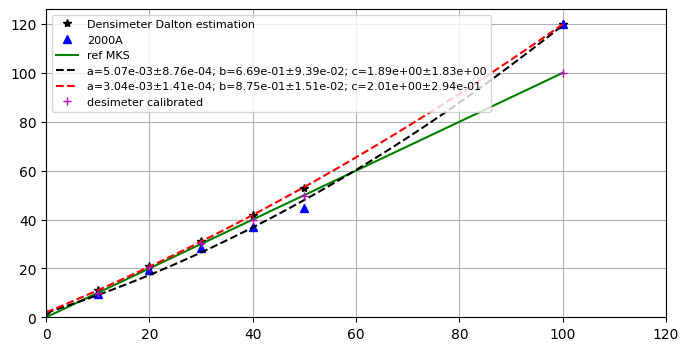

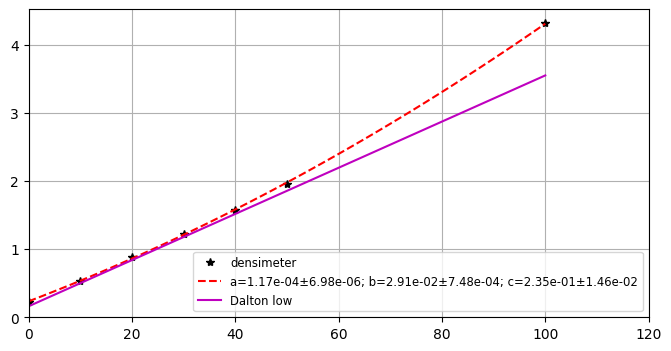

In [175]:
def funcl(x, a, b):
    import numpy as np
    return a*np.log2(x) + b
def func(x, m, q):
    return m*x + q
def func2(x, a, b, c):
    return a*x**2 + b*x + c
def dens(x, P=997.0, T=23.5):
    P = P*0.000986923
    dHe = 4.003*P/(0.0821*(T+273.15)) # densita' solo He
    dCF4 = 88.0043*P/(0.0821*(T+273.15)) # densita' solo CF4 
    return (dHe*(1-x/100)+dCF4*x/100)
def plot1(d):
    plt.figure(figsize=(8, 4))
    plt.plot(d[:,0], d[:,3], 'k*', label='Densimeter Dalton estimation')
    plt.plot(d[:,0], d[:,1], 'b^', label='2000A')
    plt.plot(d[:,0], d[:,0], 'g-', label='ref MKS')

    popt, pcov = curve_fit(func2, d[:,0], d[:,1])
    popt2, pcov2 = curve_fit(func2, d[:,0], d[:,3])
    err = np.sqrt(np.diag(pcov))
    err2 = np.sqrt(np.diag(pcov2))
    x=np.linspace(0, 100, 100)
    plt.plot(x, func2(x, *popt), 'k--', label='a={:.2e}±{:.2e}; b={:.2e}±{:.2e}; c={:.2e}±{:.2e}'\
             .format(popt[0], err[0], popt[1], err[1], popt[2], err[2]))
    plt.plot(x, func2(x, *popt2), 'r--', label='a={:.2e}±{:.2e}; b={:.2e}±{:.2e}; c={:.2e}±{:.2e}'\
             .format(popt2[0], err2[0], popt2[1], err2[1], popt2[2], err2[2]))
    def dens_cor(x, p):
        return x-np.abs(func2(x,*p)-x)
    plt.plot(d[:,0], d[:,3]-np.abs(d[:,0]-func2(d[:,0], *popt2)), 'm+', label="desimeter calibrated")
    plt.legend(fontsize=8)
    plt.xlim(0,120)
    plt.ylim(0,)
    plt.grid()
    plt.show()
def plot2(d):
    plt.figure(figsize=(8, 4))


    plt.plot(d[:,0], d[:,2], 'k*', label='densimeter')
    popt2, pcov2 = curve_fit(func2, d[:,0], d[:,2])
    err2 = np.sqrt(np.diag(pcov2))
    x=np.linspace(0, 100, 100)
    plt.plot(x, func2(x, *popt2), 'r--', label='a={:.2e}±{:.2e}; b={:.2e}±{:.2e}; c={:.2e}±{:.2e}'\
             .format(popt2[0], err2[0], popt2[1], err2[1], popt2[2], err2[2]))
    plt.plot(x, dens(x), 'm-', label="Dalton low")
    #plt.plot(d2[:,0], d2[:,2]-(d2[:,2]-func2(d2[:,0],*popt2)), 'g^', label="calibrated")
    plt.legend(fontsize='small')
    plt.xlim(0,120)
    plt.ylim(0,)
    plt.grid()
    plt.show()
plot1(d)
plot2(d)